<a href="https://colab.research.google.com/github/asmitabhangare/Zomato_Analysis/blob/main/Zomato_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/zomato.csv')
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [ ]:
df.shape

(51717, 17)

In [ ]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

# Data Cleaning

In [ ]:
df.isna().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [ ]:
feature_na=[feature for feature in df.columns if df[feature].isnull().sum()>0]
feature_na

['rate',
 'phone',
 'location',
 'rest_type',
 'dish_liked',
 'cuisines',
 'approx_cost(for two people)']

In [ ]:
df.dropna(axis='index',subset=['rate'],inplace=True)

In [ ]:
df.shape

(43942, 17)

In [ ]:
def split(x):
    return x.split('/')[0]

In [ ]:
df['rate'] = df['rate'].apply(split)

In [ ]:
df.head(5)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [ ]:
df['rate'].unique()

array(['4.1', '3.8', '3.7', '3.6', '4.6', '4.0', '4.2', '3.9', '3.1',
       '3.0', '3.2', '3.3', '2.8', '4.4', '4.3', 'NEW', '2.9', '3.5',
       '2.6', '3.8 ', '3.4', '4.5', '2.5', '2.7', '4.7', '2.4', '2.2',
       '2.3', '3.4 ', '-', '3.6 ', '4.8', '3.9 ', '4.2 ', '4.0 ', '4.1 ',
       '3.7 ', '3.1 ', '2.9 ', '3.3 ', '2.8 ', '3.5 ', '2.7 ', '2.5 ',
       '3.2 ', '2.6 ', '4.5 ', '4.3 ', '4.4 ', '4.9', '2.1', '2.0', '1.8',
       '4.6 ', '4.9 ', '3.0 ', '4.8 ', '2.3 ', '4.7 ', '2.4 ', '2.1 ',
       '2.2 ', '2.0 ', '1.8 '], dtype=object)

In [ ]:
df.replace('NEW',0,inplace=True)

In [ ]:
df.replace('-',0,inplace=True)

In [ ]:
df['rate'] = df['rate'].astype(float)

# Calculate Average Rating of each restaurant

In [ ]:
df_rate = df.groupby('name')['rate'].mean().to_frame().reset_index()
df_rate.columns=['restaurant','rating']
df_rate.head(10).style.background_gradient(subset=['rating'], cmap='viridis')

,restaurant,rating
0,#FeelTheROLL,3.400000
1,#L-81 Cafe,3.900000
2,#refuel,3.700000
3,1000 B.C,3.200000
4,100ÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ°C,3.700000
5,11 to 11 Express Biriyanis,3.500000
6,1131 Bar + Kitchen,4.500000
7,12th Main - Grand Mercure,4.100000
8,1441 Pizzeria,4.100000
9,1522 - The Pub,4.212000


# Get distribution of Rating column

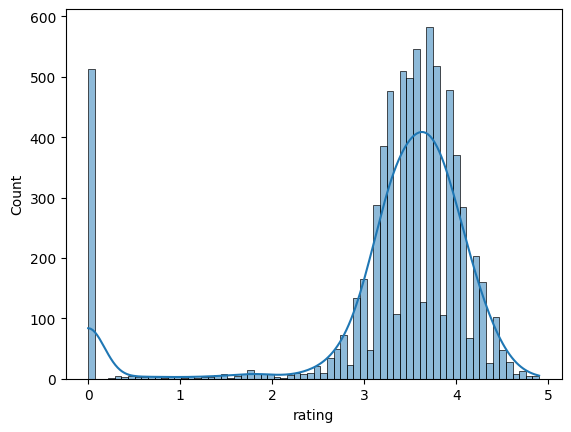

In [ ]:
sns.histplot(df_rate['rating'],kde=True)
plt.show()

Almost more than 50 percent of restaurants has rating between 3 and 4. Restaurants having rating more than 4.5 are very rare.

# Top restaurant chains in Bengalore

In [ ]:
chains = df['name'].value_counts().to_frame().reset_index()
chains.columns=['restaurant','count']
chains.head(10).style.background_gradient(subset=['count'], cmap='viridis')

,restaurant,count
0,Cafe Coffee Day,89
1,Onesta,85
2,Empire Restaurant,71
3,Just Bake,68
4,Five Star Chicken,68
5,Kanti Sweets,68
6,Petoo,64
7,Baskin Robbins,63
8,Pizza Hut,62
9,Polar Bear,61


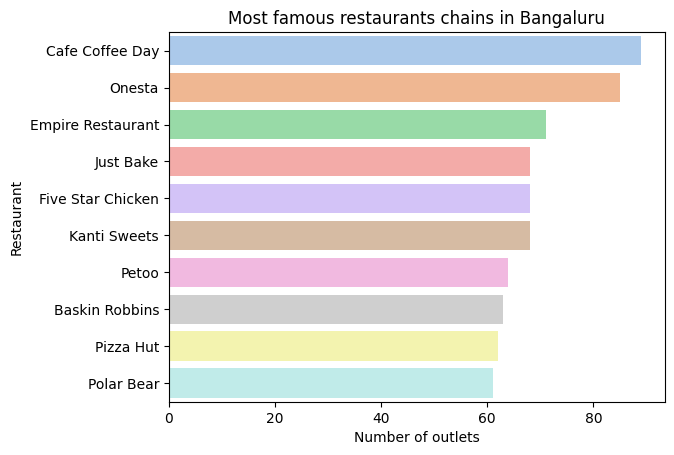

In [ ]:
sns.barplot(x='count',y='restaurant',data=chains.head(10),hue = 'restaurant',palette = "pastel")
plt.title("Most famous restaurants chains in Bangaluru")
plt.xlabel("Number of outlets")
plt.ylabel("Restaurant")
plt.show()

# How many of the restaurant do not accept online orders?

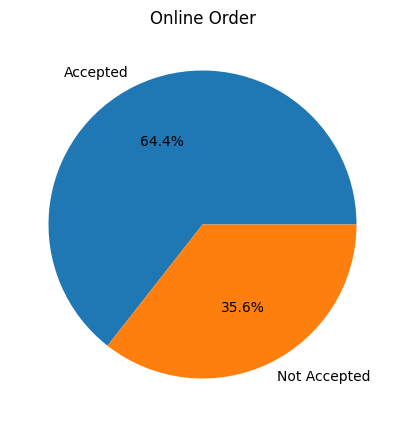

In [ ]:
l = ['Accepted','Not Accepted']
plt.figure(figsize=(10,5))
plt.pie(df['online_order'].value_counts(),labels=l,autopct='%1.1f%%')
plt.title('Online Order')
plt.show()

In [ ]:
df['online_order'].value_counts()

online_order
Yes    28308
No     15634
Name: count, dtype: int64

# What is the ratio b/w restaurants that provide and do not provide table booking?

In [ ]:
total_booking = df['book_table'].shape[0]
table_booking_y = (df[df['book_table']=='Yes'].shape[0])/total_booking*100
table_booking_n = (df[df['book_table']=='No'].shape[0])/total_booking*100

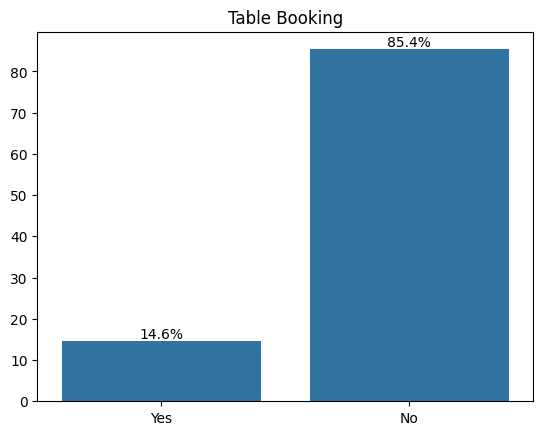

In [ ]:
ax = sns.barplot(x=['Yes','No'],y=[table_booking_y,table_booking_n])
ax = plt.bar_label(ax.containers[0],fmt='%.1f%%')
plt.title('Table Booking')
plt.show()

# How many types of restaurants we have?

In [ ]:
df['rest_type'].isna().sum()

0

In [ ]:
df.dropna(axis=0,subset=['rest_type'],inplace=True)

In [ ]:
len(df['rest_type'].unique())

87

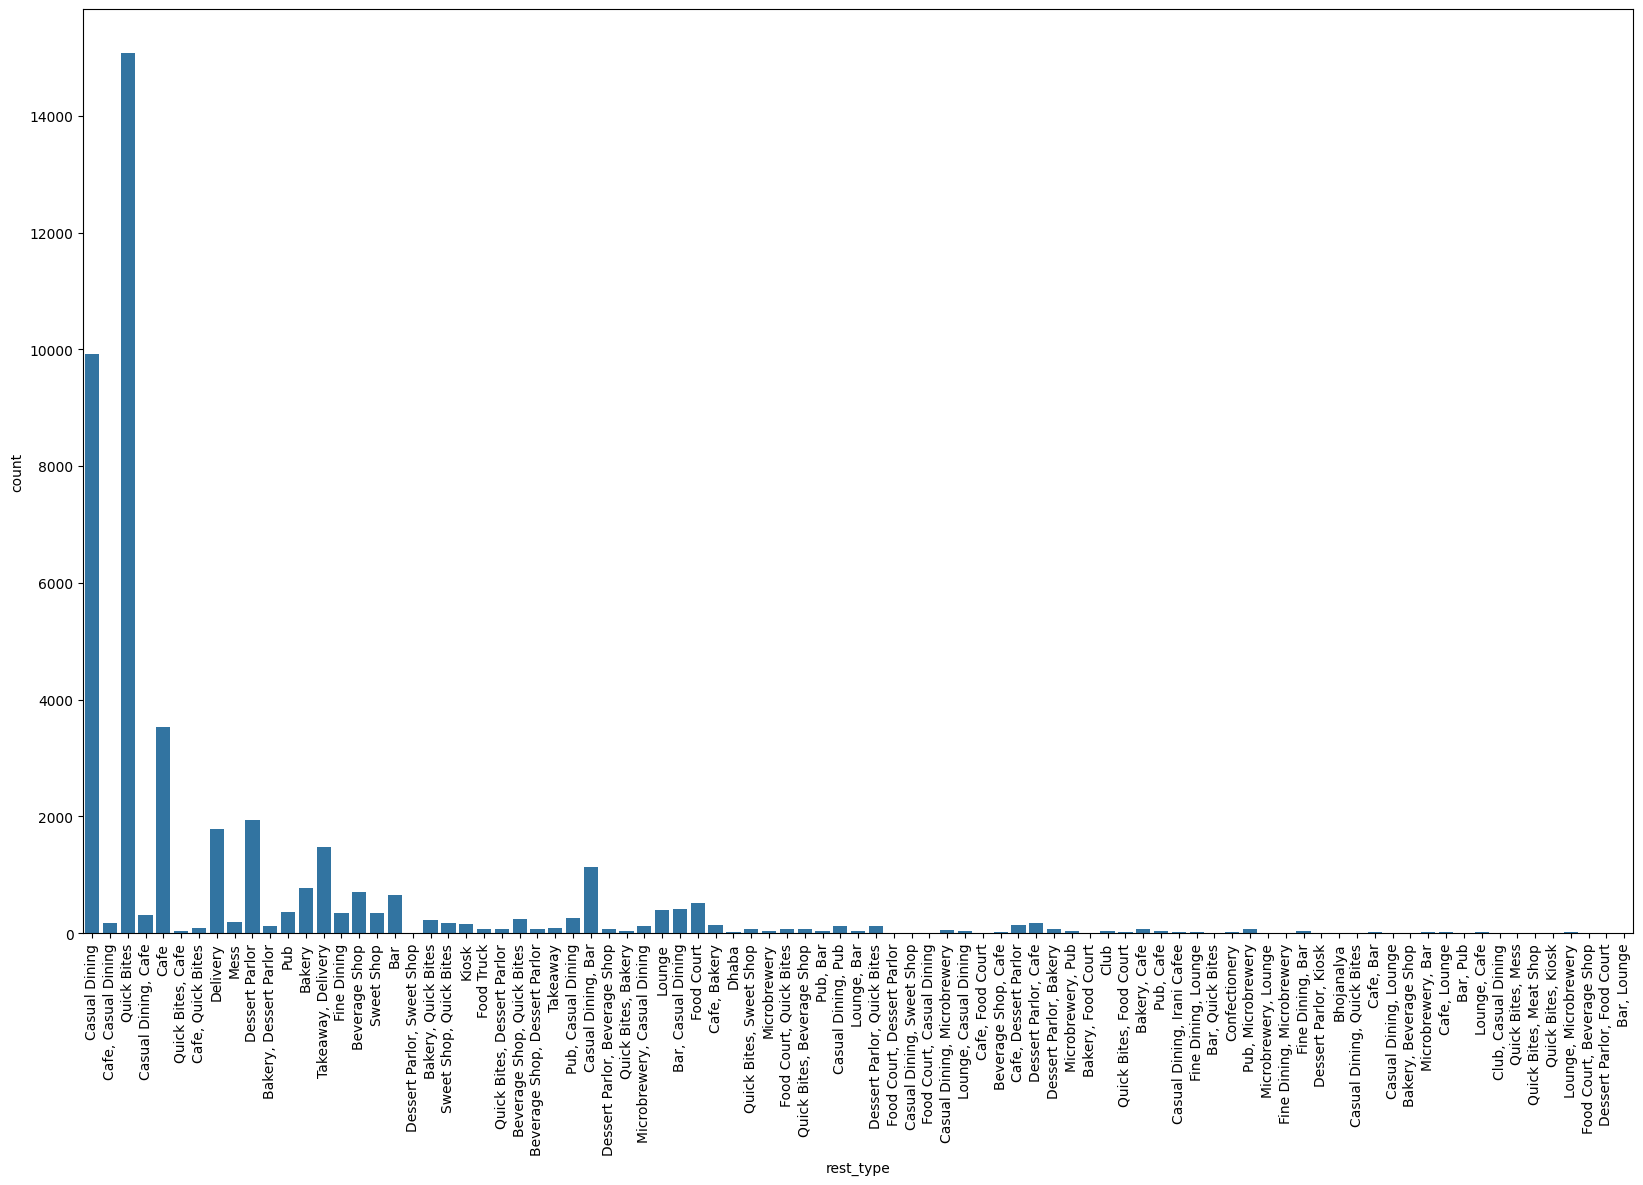

In [ ]:
plt.figure(figsize=(20,12))
sns.countplot(x='rest_type',data=df)
plt.xticks(rotation=90)
plt.show()

At all, Banglore is known as the tech capital of India,people having busy and modern life will prefer Quick Bites.

# Highest voted restaurant

In [ ]:
df_votes = df.groupby('name')['votes'].max().nlargest(10).to_frame().reset_index()
df_votes.columns=['restaurant','votes']
df_votes.head(10).style.background_gradient(subset=['votes'], cmap='viridis')

,restaurant,votes
0,Byg Brewski Brewing Company,16832
1,Toit,14956
2,Truffles,14726
3,AB's - Absolute Barbecues,12121
4,The Black Pearl,10550
5,Big Pitcher,9300
6,Onesta,9085
7,Arbor Brewing Company,8419
8,Empire Restaurant,8304
9,Prost Brew Pub,7871


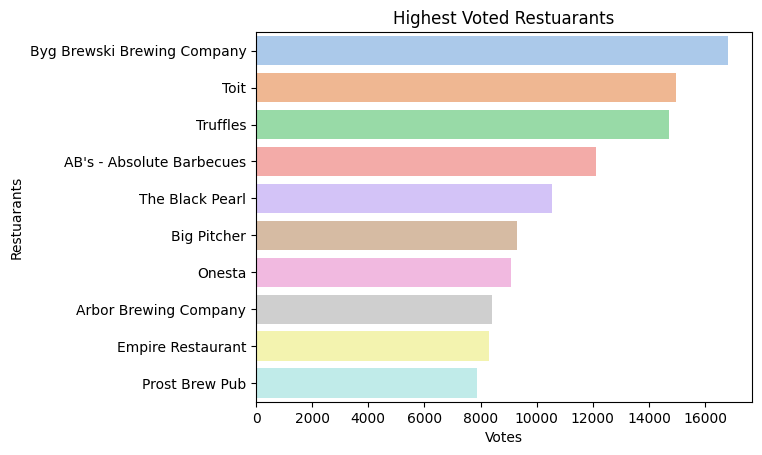

In [ ]:
sns.barplot(x='votes',y='restaurant',data=df_votes,hue = 'restaurant',palette = "pastel")
plt.title("Highest Voted Restuarants")
plt.ylabel("Restuarants")
plt.xlabel("Votes")
plt.show()

# Total restaurants at different locations of Bengalore

In [ ]:
df.groupby('location')['name'].unique()

location
BTM                  [Sankranthi Veg Restaurant, Hearts Unlock Cafe...
Banashankari         [Jalsa, Spice Elephant, San Churro Cafe, Addhu...
Banaswadi            [Cafe Nibras, The Sanctuary, Crunch Pizzas, Pi...
Bannerghatta Road    [Deja Vu Resto Bar, Fattoush, Empire Restauran...
Basavanagudi         [Grand Village, Timepass Dinner, Srinathji's C...
                                           ...                        
West Bangalore       [FreshMenu, Fit Dish Fetish, Garden City Mobil...
Whitefield           [Imperio Cafe, Night Diaries, LocalHost, AB's ...
Wilson Garden        [Tree Top, Sahana's (Nati Style), Karavali Kol...
Yelahanka            [Prashanth Naati Corner, Cheta's Kitchen, Twis...
Yeshwantpur          [Chef's Bank, New Agarwal Bhavan, Fishing Boat...
Name: name, Length: 92, dtype: object

In [ ]:
restaurant=[]
location=[]
for key,location_df in df.groupby('location'):
    location.append(key)
    restaurant.append(len(location_df['name'].unique()))

In [ ]:
df_total=pd.DataFrame(zip(location,restaurant))
df_total.columns=['location','restaurant']
df_total.set_index('location',inplace=True)
df_total.sort_values(by='restaurant').tail(10).style.background_gradient(cmap="Wistia")

,restaurant
location,
Bellandur,281
Jayanagar,310
Bannerghatta Road,361
JP Nagar,398
Indiranagar,466
Electronic City,515
Marathahalli,520
HSR,551
BTM,578


# Total number of variety of restaurants ie north indian,south Indian

Text(0.5, 1.0, 'Most popular cuisines of Bangalore')

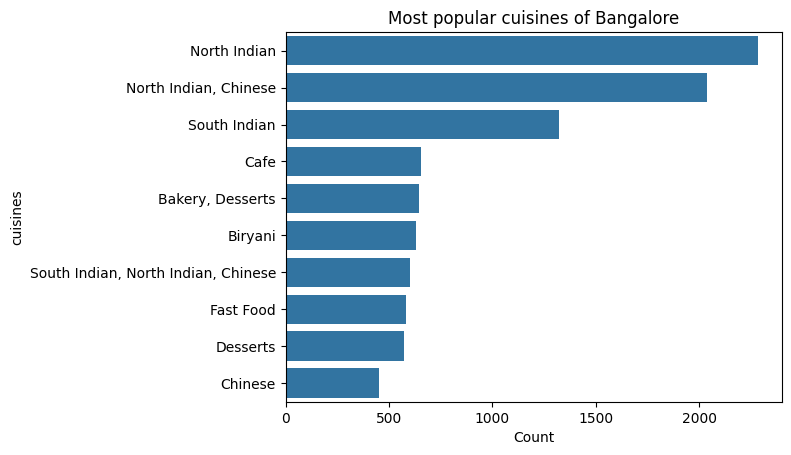

In [ ]:
cuisines=df['cuisines'].value_counts()[:10]
sns.barplot(x=cuisines,y=cuisines.index)
plt.xlabel('Count')
plt.title("Most popular cuisines of Bangalore")

We can observe that North Indian,chinese,South Indian and Biriyani are most common.

It means Bengalore is more influenced by North Indian culture more than South.

# Analyse Approx cost for 2 people.

In [ ]:
df['approx_cost(for two people)'].isna().sum()

252

In [ ]:
df.dropna(axis='index',subset=['approx_cost(for two people)'],inplace=True)

In [ ]:
df['approx_cost(for two people)'].isna().sum()

0

In [ ]:
len(df['approx_cost(for two people)'].value_counts())

66

In [ ]:
df['approx_cost(for two people)'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '1,700', '1,400', '1,350', '2,200', '2,000',
       '1,800', '1,900', '180', '330', '2,500', '2,100', '3,000', '2,800',
       '3,400', '50', '40', '1,250', '3,500', '4,000', '2,400', '2,600',
       '1,450', '70', '3,200', '560', '240', '360', '6,000', '1,050',
       '2,300', '4,100', '120', '5,000', '3,700', '1,650', '2,700',
       '4,500'], dtype=object)

In [ ]:
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].apply(lambda x: x.replace(',',''))

In [ ]:
df['approx_cost(for two people)']=df['approx_cost(for two people)'].astype(int)

In [ ]:
df['approx_cost(for two people)'].dtype

dtype('int64')

# Cost vs Rating

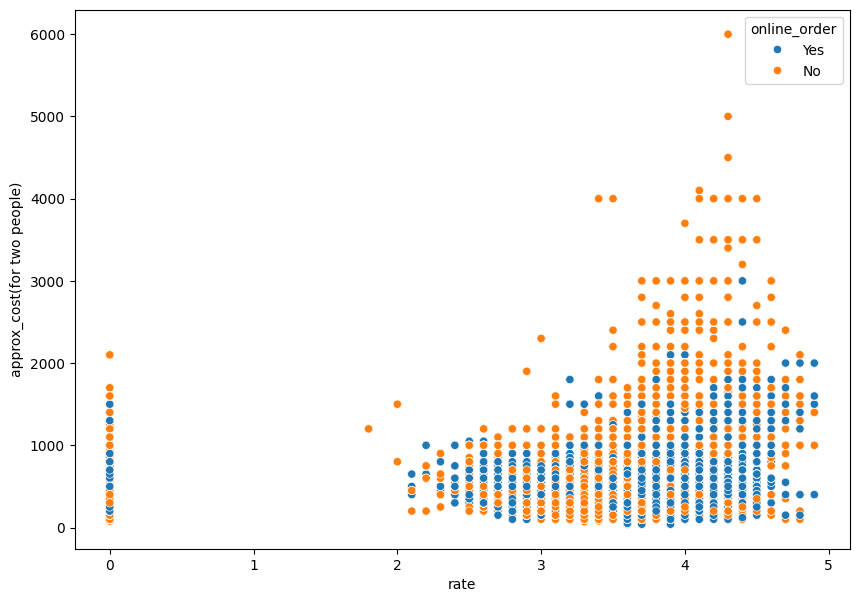

In [ ]:
plt.figure(figsize=(10,7))
sns.scatterplot(x="rate",y='approx_cost(for two people)',hue='online_order',data=df)
plt.show()

From this scattterplot,we can come up with a conclusion ya most of the highest rated accepts online order and they r budgeted too

# Is there any difference b/w votes of restaurants accepting and not accepting online orders?

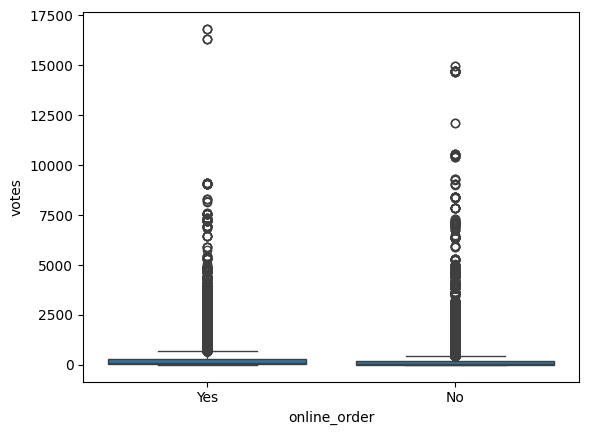

In [ ]:
sns.boxplot(x='online_order',y='votes',data=df)
plt.show()

Restaurants accepting online orders get more votes

# Is there any difference b/w price of restaurants accepting and not accepting online orders?

<Axes: xlabel='online_order', ylabel='approx_cost(for two people)'>

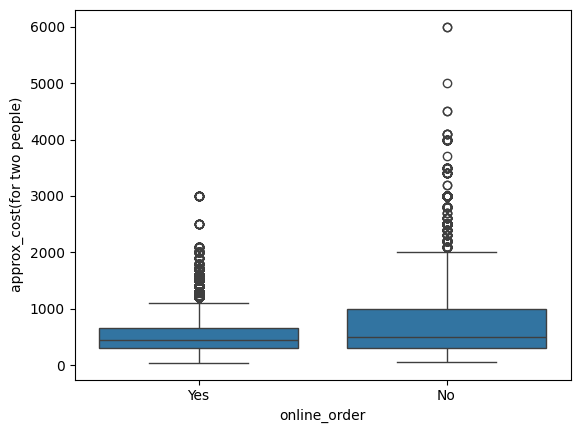

In [ ]:
sns.boxplot(x='online_order',y='approx_cost(for two people)',data=df)

Restaurants accepting online orders are more affordable than Restaurants who are accepting online orders.

# Distribution of cost for 2 people

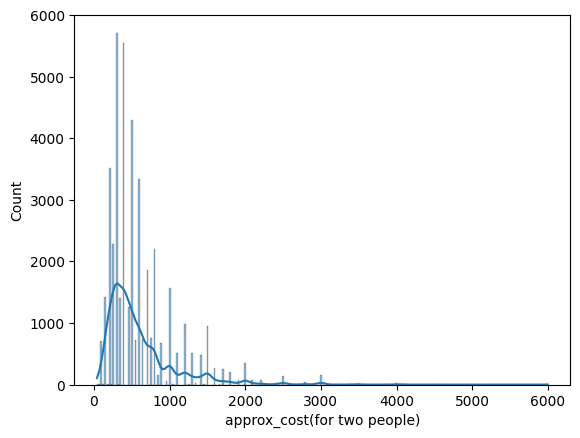

In [ ]:
sns.histplot(df['approx_cost(for two people) '],kde=True)
plt.show()

most of the price lies between in a range of under 1000,it means most are affordable & very few are luxurious.

# Top 10 Most Expensive restaurant with approx cost for 2 people

In [ ]:
df1 = df.copy()

In [ ]:
df1.set_index('name',inplace=True)

<Axes: xlabel='name'>

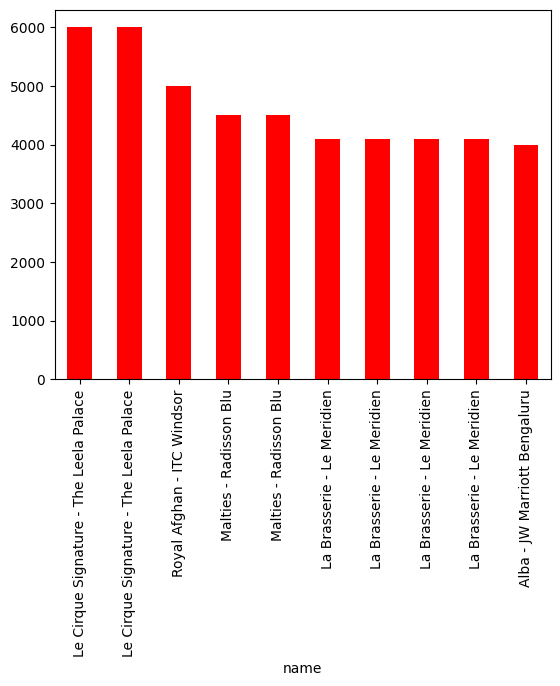

In [ ]:
df1['approx_cost(for two people)'].nlargest(10).plot.bar(color='red')

# Top 10 Cheapest restaurant with approx cost for 2 people

<Axes: xlabel='name'>

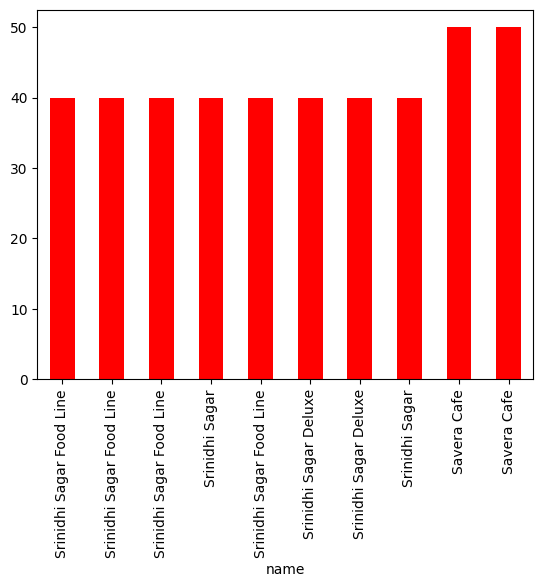

In [ ]:
df1['approx_cost(for two people)'].nsmallest(10).plot.bar(color='red')

# All the restautant that are below than 500(budget hotel)

In [ ]:
df1.set_index('location',inplace=True)

In [ ]:
df1[df1['approx_cost(for two people)']<=500]

,url,address,online_order,book_table,rate,votes,phone,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
location,,,,,,,,,,,,,,,
Banashankari,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",No,No,3.7,88,+91 9620009302,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
Banashankari,https://www.zomato.com/bangalore/caf%C3%A9-dow...,"12,29 Near PES University Back Gate, D'Souza N...",Yes,No,4.1,402,080 26724489\r\n+91 7406048982,Cafe,"Waffles, Pasta, Crispy Chicken, Honey Chilli C...",Cafe,500,"[('Rated 4.0', 'RATED\n We ended up here on a...",[],Cafes,Banashankari
Banashankari,https://www.zomato.com/bangalore/the-coffee-sh...,"6th Block, 3rd Stage, Banashankari, Bangalore",Yes,Yes,4.2,164,+91 9731644212,Cafe,"Coffee, Spaghetti, Pancakes, Nachos, Pasta, Sa...","Cafe, Chinese, Continental, Italian",500,"[('Rated 4.0', ""RATED\n Food - 4/5\nAmbience ...",[],Cafes,Banashankari
Banashankari,https://www.zomato.com/bangalore/caf-eleven-ba...,"111, Sapphire Toys Building, 100 Feet Ring Roa...",No,No,4.0,424,080 49577715,Cafe,"Sandwich, Omelette, Ice Tea, Virgin Mojito, Ho...","Cafe, Continental",450,"[('Rated 2.0', ""RATED\n This is a hookah cafe...",[],Cafes,Banashankari
Banashankari,https://www.zomato.com/bangalore/t3h-cafe-bana...,"504, CJ Venkata Das Road, Padmanabhangar, 2nd ...",No,No,3.9,93,+91 8884726600,Cafe,"Cheese Maggi, Peri Peri Fries, Pasta Arrabiata","Cafe, Italian, American",300,"[('Rated 4.0', ""RATED\n Happy to see such a c...",[],Cafes,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Brookefield,https://www.zomato.com/bangalore/venice-kerala...,"Opposite Brookfield Mall, Shiva Temple Road, B...",No,No,3.7,34,+91 8880059495,Quick Bites,NaN,Kerala,200,"[('Rated 5.0', 'RATED\n Loved this restaurant...",[],Dine-out,Whitefield
KR Puram,https://www.zomato.com/bangalore/thai-chinese-...,"7, Anurhh Arcade, Hoodi Road, Kodigehalli Road...",No,No,3.4,7,+91 9206260085\n+91 7619416923,Quick Bites,NaN,"Chinese, Thai",400,"[('Rated 5.0', 'RATED\n Its Looking delicious...",[],Dine-out,Whitefield
Brookefield,https://www.zomato.com/bangalore/the-crunch-br...,"33/1, Kundalahalli Road, Brookefield, Bangalore",No,No,3.3,6,+91 9016277963,Beverage Shop,NaN,Beverages,300,"[('Rated 3.0', 'RATED\n the sandwich was not ...",[],Dine-out,Whitefield


In [ ]:
df_budget=df1[df1['approx_cost(for two people)']<=500].loc[:,('approx_cost(for two people)')]
df_budget=df_budget.reset_index()
df_budget.head().tail(10).style.background_gradient(cmap="Wistia")

,location,approx_cost(for two people)
0,Banashankari,300
1,Banashankari,500
2,Banashankari,500
3,Banashankari,450
4,Banashankari,300


<Axes: xlabel='approx_cost(for two people)'>

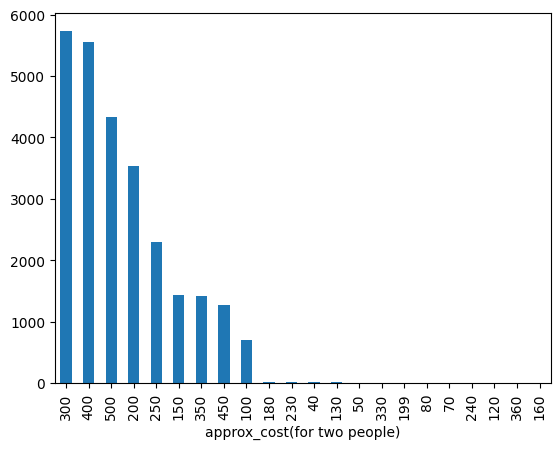

In [ ]:
df_budget['approx_cost(for two people)'].value_counts().plot.bar()

300 and 400 cost dishes are maximum in count.

# Restaurants that have better rating >4 and that are under budget too

In [ ]:
df[(df['rate']>=4) & (df['approx_cost(for two people)']<=500)].shape

(4001, 17)

# Total numbers of Restaurants that have better rating >4 and that are under budget too ie less than 500

In [ ]:
df_new=df[(df['rate']>=4) & (df['approx_cost(for two people)']<=500)]
len(df_new['name'].unique())

626

# Total such various affordable hotels at different location

In [ ]:
location=[]
total=[]
for loc,location_df in df_new.groupby('location'):
    location.append(loc)
    total.append(len(location_df['name'].unique()))

In [ ]:
location_df=pd.DataFrame(zip(location,total))
location_df.columns=['location','restaurant']
location_df.set_index('location',inplace=True)

In [ ]:
location_df.head(20).tail(10).style.background_gradient(cmap="Wistia")

,restaurant
location,
City Market,1
Commercial Street,4
Cunningham Road,4
Domlur,5
Ejipura,1
Electronic City,23
Frazer Town,15
HBR Layout,3
HSR,58


Text(0, 0.5, 'Total restaurants')

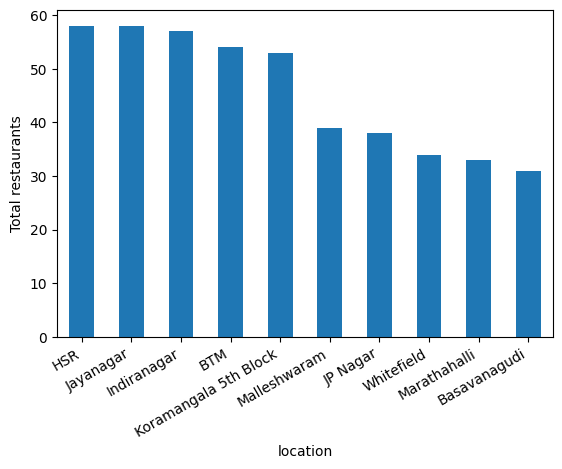

In [ ]:
location_df['restaurant'].nlargest(10).plot.bar()
plt.gcf().autofmt_xdate()
plt.ylabel('Total restaurants')

# Which are the foodie areas?

<Axes: xlabel='count', ylabel='location'>

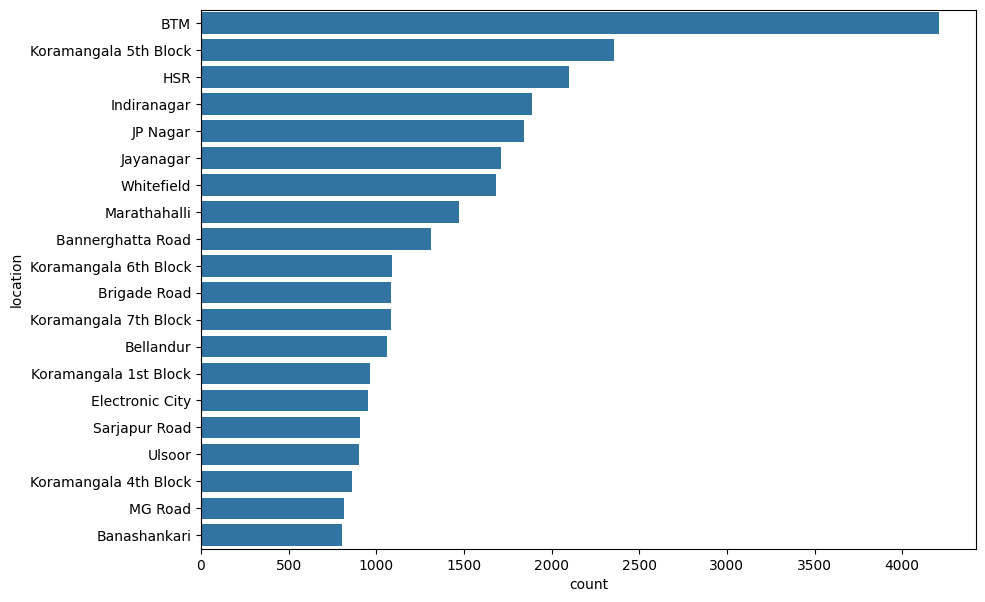

In [ ]:
plt.figure(figsize=(10,7))
Restaurant_locations=df['location'].value_counts()[:20]
sns.barplot(x=Restaurant_locations,y=Restaurant_locations.index)

We can see that BTM,HSR and Koranmangala 5th block has the most number of restaurants.

# Geographical Analysis

In [ ]:
df.shape

(43942, 17)

In [ ]:
len(df['location'].unique())

92

In [ ]:
locations=pd.DataFrame({"Name":df['location'].unique()})
locations

,Name
0,Banashankari
1,Basavanagudi
2,Mysore Road
3,Jayanagar
4,Kumaraswamy Layout
...,...
87,Sahakara Nagar
88,Jalahalli
89,Nagarbhavi
90,Peenya


In [ ]:
from geopy.geocoders import Nominatim

In [ ]:
lat_lon=[]
geolocator=Nominatim(user_agent="app")
for location in locations['Name']:
    location = geolocator.geocode(location)
    if location is None:
        lat_lon.append(np.nan)
    else:
        geo=(location.latitude,location.longitude)
        lat_lon.append(geo)

In [ ]:
locations['geo_loc']=lat_lon

In [ ]:
locations.head()

,Name,geo_loc
0,Banashankari,"(15.8876779, 75.7046777)"
1,Basavanagudi,"(13.8345913, 75.7339359)"
2,Mysore Road,"(12.9466619, 77.5300896)"
3,Jayanagar,"(27.3493013, 95.3159407)"
4,Kumaraswamy Layout,"(12.9067683, 77.5595021)"


In [ ]:
Rest_locations=pd.DataFrame(df['location'].value_counts().reset_index())

In [ ]:
Rest_locations.columns=['Name','count']
Rest_locations.head().style.background_gradient(cmap="Wistia")

,Name,count
0,BTM,4261
1,Koramangala 5th Block,2381
2,HSR,2128
3,Indiranagar,1936
4,JP Nagar,1849


In [ ]:
locations.shape

(92, 2)

In [ ]:
Rest_locations.shape

(92, 2)

In [ ]:
Restaurant_locations=Rest_locations.merge(locations,on='Name',how="left").dropna()
Restaurant_locations.head().style.background_gradient(cmap="Wistia")

,Name,count,geo_loc
0,BTM,4261,"(45.95485055, -112.49659530324134)"
1,Koramangala 5th Block,2381,"(12.9348429, 77.6189768)"
2,HSR,2128,"(29.1523467, 75.7245798)"
3,Indiranagar,1936,"(12.9732913, 77.6404672)"
4,JP Nagar,1849,"(12.9096941, 77.5866067)"


In [ ]:
Restaurant_locations.shape

(91, 3)

In [ ]:
def generateBaseMap(default_location=[12.97, 77.59], default_zoom_start=12):
    base_map = folium.Map(location=default_location, zoom_start=default_zoom_start)
    return base_map

In [ ]:
np.array(Restaurant_locations['geo_loc'])

array([(45.95485055, -112.49659530324134), (12.9348429, 77.6189768),
       (29.1523467, 75.7245798), (12.9732913, 77.6404672),
       (12.9096941, 77.5866067), (27.3493013, 95.3159407),
       (53.5533682, -2.2969019), (12.9552572, 77.6984163),
       (12.9444546, 77.60276), (12.9390255, 77.6238477),
       (12.9364846, 77.6134783), (44.621621, -84.790422),
       (12.93103185, 77.6782471), (12.9277245, 77.6327822),
       (12.848759900000001, 77.64825295827616), (12.9241419, 77.6288623),
       (12.9778793, 77.6246697), (12.9327778, 77.6294052),
       (12.9755264, 77.6067902), (15.8876779, 75.7046777),
       (19.1602288, 76.2772822), (13.0027353, 77.5703253),
       (40.5980948, -74.0922751), (13.8345913, 75.7339359),
       (38.7389989, -77.5276456), (33.5935063, -79.0345627),
       (12.9986827, 77.615525), (40.7188032, -74.0048756),
       (13.0093455, 77.6377094), (13.0268145, 77.5717187),
       (13.0141618, 77.6518539), (32.8808782, -105.9752565),
       (12.9882338, 77.55488

In [ ]:
lat,lon=zip(*np.array(Restaurant_locations['geo_loc']))

In [ ]:
Restaurant_locations['lat']=lat
Restaurant_locations['lon']=lon

In [ ]:
Restaurant_locations.head().style.background_gradient(cmap="Wistia")

,Name,count,geo_loc,lat,lon
0,BTM,4261,"(45.95485055, -112.49659530324134)",45.954851,-112.496595
1,Koramangala 5th Block,2381,"(12.9348429, 77.6189768)",12.934843,77.618977
2,HSR,2128,"(29.1523467, 75.7245798)",29.152347,75.724580
3,Indiranagar,1936,"(12.9732913, 77.6404672)",12.973291,77.640467
4,JP Nagar,1849,"(12.9096941, 77.5866067)",12.909694,77.586607


In [ ]:
import folium
from folium.plugins import HeatMap
basemap=generateBaseMap()

In [ ]:
Restaurant_locations[['lat','lon','count']].values.tolist()

[[45.95485055, -112.49659530324134, 4261.0],
 [12.9348429, 77.6189768, 2381.0],
 [29.1523467, 75.7245798, 2128.0],
 [12.9732913, 77.6404672, 1936.0],
 [12.9096941, 77.5866067, 1849.0],
 [27.3493013, 95.3159407, 1718.0],
 [53.5533682, -2.2969019, 1693.0],
 [12.9552572, 77.6984163, 1503.0],
 [12.9444546, 77.60276, 1324.0],
 [12.9390255, 77.6238477, 1111.0],
 [12.9364846, 77.6134783, 1089.0],
 [44.621621, -84.790422, 1084.0],
 [12.93103185, 77.6782471, 1078.0],
 [12.9277245, 77.6327822, 965.0],
 [12.848759900000001, 77.64825295827616, 964.0],
 [12.9241419, 77.6288623, 919.0],
 [12.9778793, 77.6246697, 901.0],
 [12.9327778, 77.6294052, 864.0],
 [12.9755264, 77.6067902, 836.0],
 [15.8876779, 75.7046777, 805.0],
 [19.1602288, 76.2772822, 748.0],
 [13.0027353, 77.5703253, 658.0],
 [40.5980948, -74.0922751, 634.0],
 [13.8345913, 75.7339359, 628.0],
 [38.7389989, -77.5276456, 608.0],
 [33.5935063, -79.0345627, 581.0],
 [12.9986827, 77.615525, 578.0],
 [40.7188032, -74.0048756, 550.0],
 [13.0093

In [ ]:
HeatMap(Restaurant_locations[['lat','lon','count']].values.tolist(),zoom=20,radius=15).add_to(basemap)

In [ ]:
basemap

* It is clear that restaurants tend to concentrate in central bangalore area.

* The clutter of restaurants lowers are we move away from central.